<a href="https://colab.research.google.com/github/N786h/MachineLearning/blob/main/EDA_on_Insurance_Claim_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1N12FKM2w24pgmQjUDORPdrorIJ7gCJS4' #<-- You add in here the id from you google drive file, you can find it

download = drive.CreateFile({'id': file_id})

# Download the file to a local disc
download.GetContentFile('file.csv')
df  = pd.read_csv("file.csv")
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [4]:
df = df.drop(['index', 'PatientID'], axis=1)
df

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...
1335,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


<ipython-input-103-535674cb8ad8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='jet', fmt='0.2f', linewidths=2)


<Axes: >

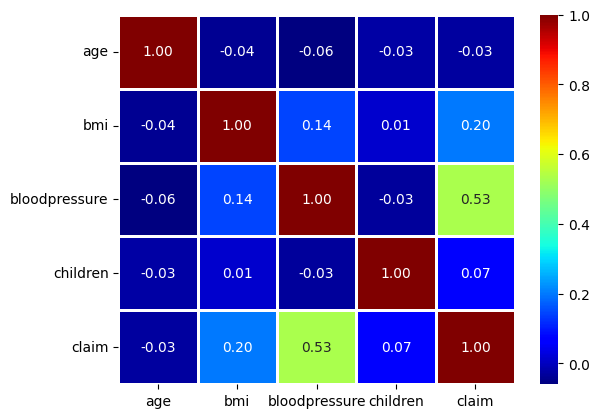

In [103]:
sns.heatmap(df.corr(), annot=True, cmap='jet', fmt='0.2f', linewidths=2)

### Univariant

#### Age

In [5]:
df['age'].describe()

count    1335.000000
mean       38.078652
std        11.102924
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

In [6]:
df['age'].isnull().sum()

5

In [7]:
df['age'].fillna(df['age'].mean(), inplace=True)

<Axes: ylabel='Density'>

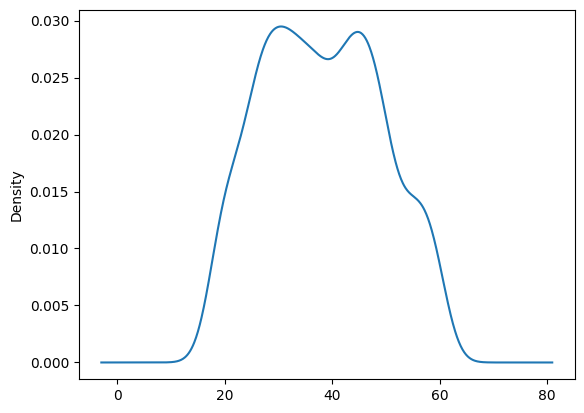

In [8]:
df['age'].plot(kind='kde')

In [9]:
df['age'].skew()

0.11382341584545372

<Axes: ylabel='Frequency'>

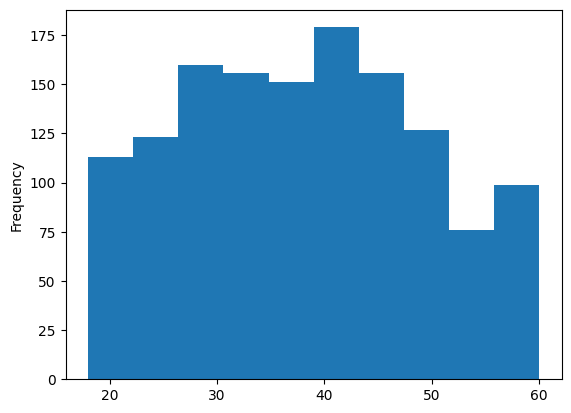

In [106]:
df['age'].plot(kind='hist')

#### Gender

In [11]:
df['gender'].value_counts()

male      678
female    662
Name: gender, dtype: int64

In [12]:
df['gender'].isnull().sum()

0

<Axes: ylabel='gender'>

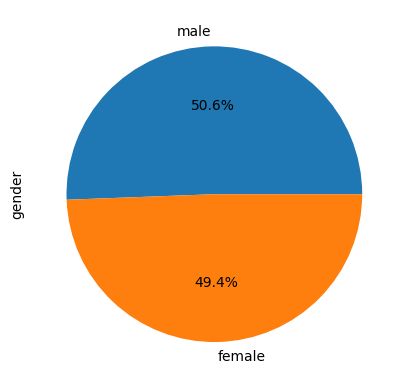

In [13]:
df['gender'].value_counts().plot(kind='pie', autopct='%0.1f%%')

#### BMI

In [14]:
df['bmi'].describe()

count    1340.000000
mean       30.668955
std         6.106735
min        16.000000
25%        26.275000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

In [15]:
df['bmi'].isnull().sum()

0

<Axes: ylabel='Density'>

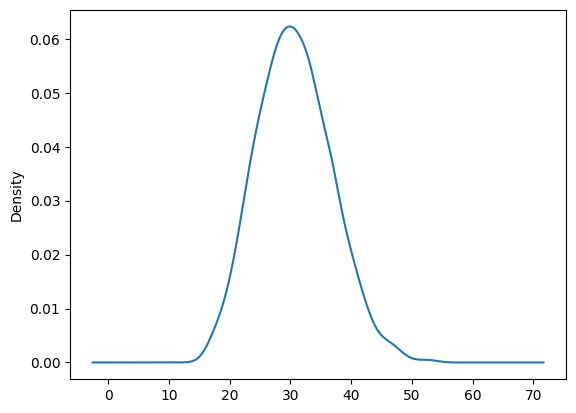

In [16]:
df['bmi'].plot(kind='kde')

In [17]:
df['bmi'].skew()

0.28597245020808587

#### bloodpressure

In [18]:
df['bloodpressure'].describe()

count    1340.000000
mean       94.157463
std        11.434712
min        80.000000
25%        86.000000
50%        92.000000
75%        99.000000
max       140.000000
Name: bloodpressure, dtype: float64

In [19]:
df['bloodpressure'].isnull().sum()

0

<Axes: ylabel='Density'>

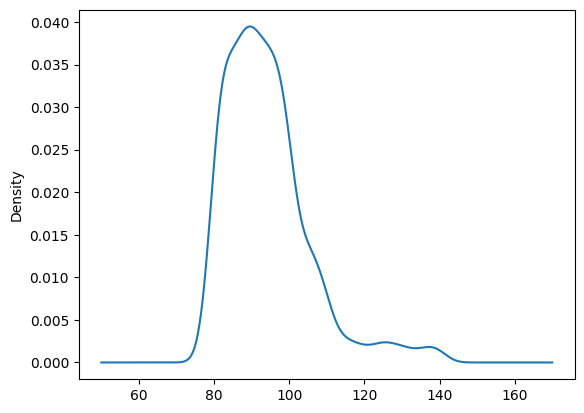

In [20]:
df['bloodpressure'].plot(kind='kde')

<Axes: >

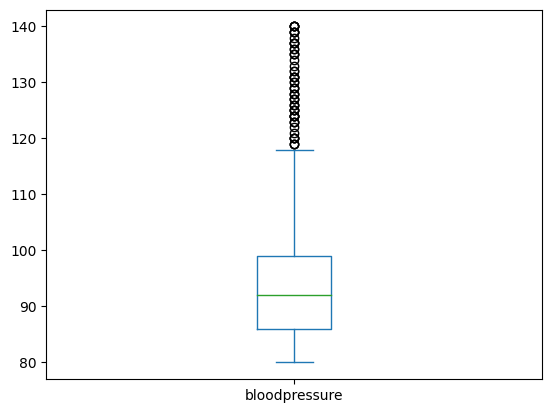

In [21]:
df['bloodpressure'].plot(kind='box')

In [22]:
df['bloodpressure'].skew()

1.4835342102293079

#### diabetic

In [23]:
df['diabetic'].value_counts()

No     698
Yes    642
Name: diabetic, dtype: int64

In [24]:
df['diabetic'].isnull().sum()

0

<Axes: ylabel='diabetic'>

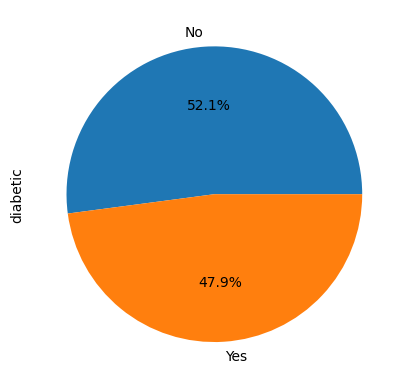

In [25]:
df['diabetic'].value_counts().plot(kind='pie', autopct='%0.1f%%')

#### children

In [26]:
df['children'].describe()

count    1340.000000
mean        1.093284
std         1.205334
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

In [27]:
df['children'].value_counts()

0    576
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<Axes: ylabel='Density'>

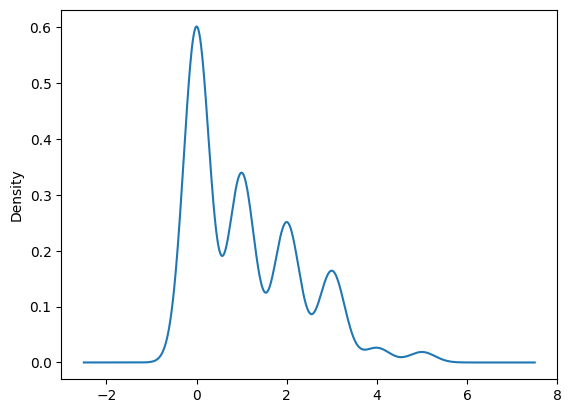

In [28]:
df['children'].plot(kind='kde')

<Axes: ylabel='children'>

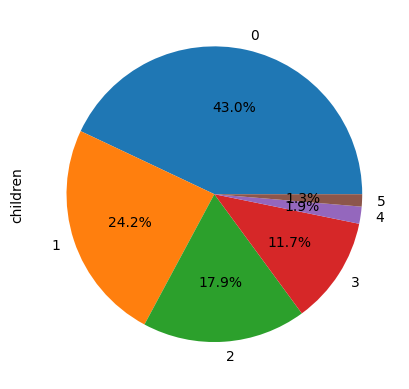

In [29]:
df['children'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [30]:
df['children'].isnull().sum()

0

#### Smoker

In [31]:
df['smoker'].value_counts()

No     1066
Yes     274
Name: smoker, dtype: int64

In [32]:
df['smoker'].isnull().sum()

0

<Axes: ylabel='smoker'>

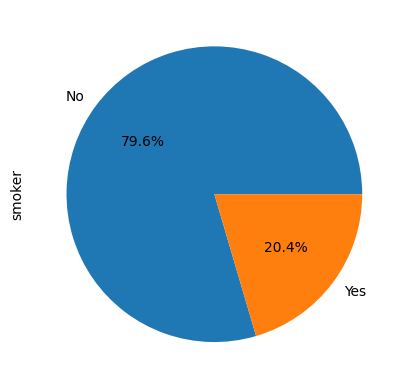

In [33]:
df['smoker'].value_counts().plot(kind='pie', autopct='%0.1f%%')

#### Region

In [34]:
df['region'].value_counts()

southeast    443
northwest    349
southwest    314
northeast    231
Name: region, dtype: int64

In [35]:
df['region'].isnull().sum()

3

In [36]:
df['region'].fillna(df['region'].mode()[0], inplace=True)

<Axes: >

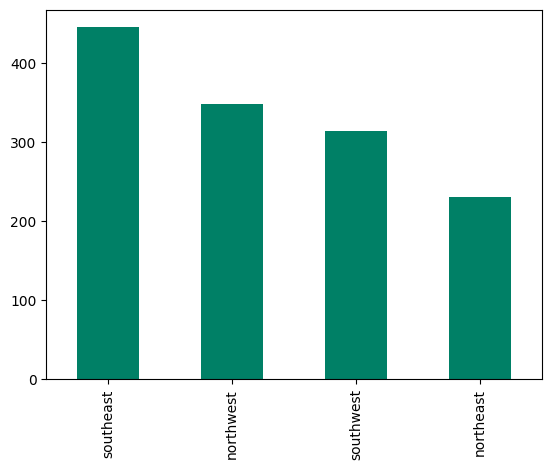

In [37]:
df['region'].value_counts().plot(kind='bar', cmap='summer')

<Axes: ylabel='region'>

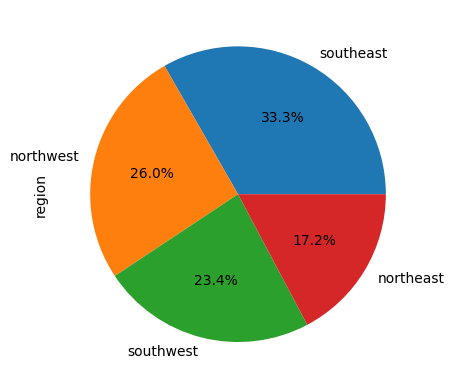

In [38]:
df['region'].value_counts().plot(kind='pie', autopct='%0.1f%%')

#### Claim

In [39]:
df['claim'].describe()

count     1340.000000
mean     13252.745642
std      12109.609288
min       1121.870000
25%       4719.685000
50%       9369.615000
75%      16604.305000
max      63770.430000
Name: claim, dtype: float64

In [40]:
df['claim'].skew()

1.5167468509489237

<Axes: ylabel='Density'>

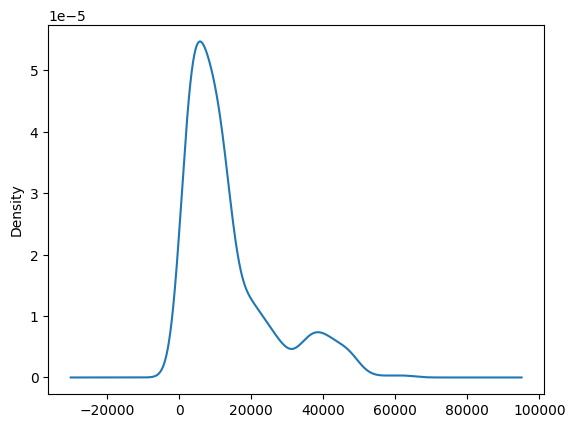

In [41]:
df['claim'].plot(kind='kde')

In [42]:
df['claim'].isnull().sum()

0

<Axes: >

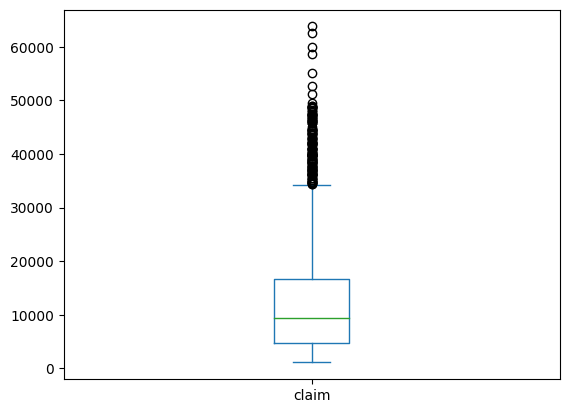

In [43]:
df['claim'].plot(kind='box')

### Bivariant

#### Age Vs Rest

In [44]:
pd.crosstab(df['age'], df['claim'], normalize='columns')*100

claim,1121.87,1131.51,1135.94,1136.40,1137.01,1137.47,1141.45,1146.80,1149.40,1163.46,...,48885.14,48970.25,49577.66,51194.56,52590.83,55135.40,58571.07,60021.40,62592.87,63770.43
age,,,,,,,,,,,,,,,,,,,,,
18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24.000000,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


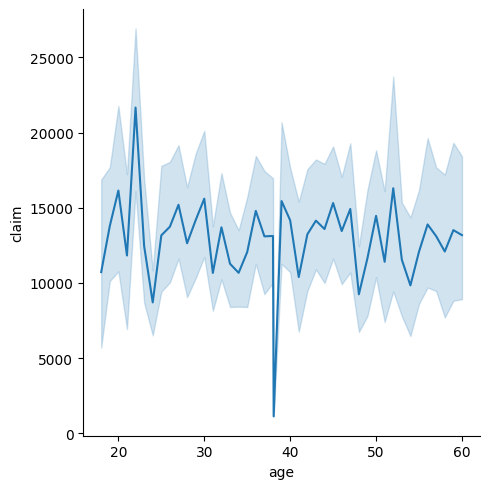

In [45]:
sns.relplot(data=df, x='age', y='claim', kind='line')

<Axes: xlabel='region', ylabel='age'>

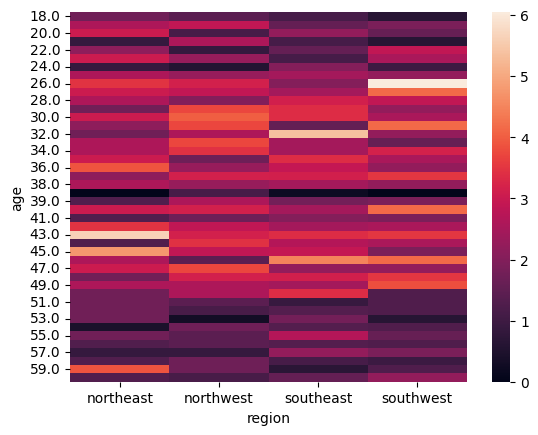

In [46]:
sns.heatmap(pd.crosstab(df['age'], df['region'], normalize='columns')*100)

<Axes: xlabel='gender', ylabel='age'>

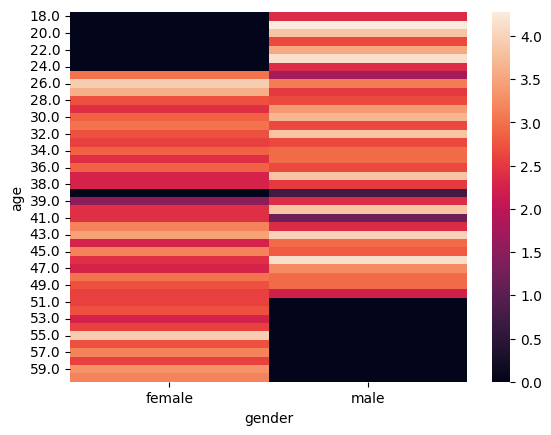

In [47]:
sns.heatmap(pd.crosstab(df['age'], df['gender'], normalize='columns')*100)

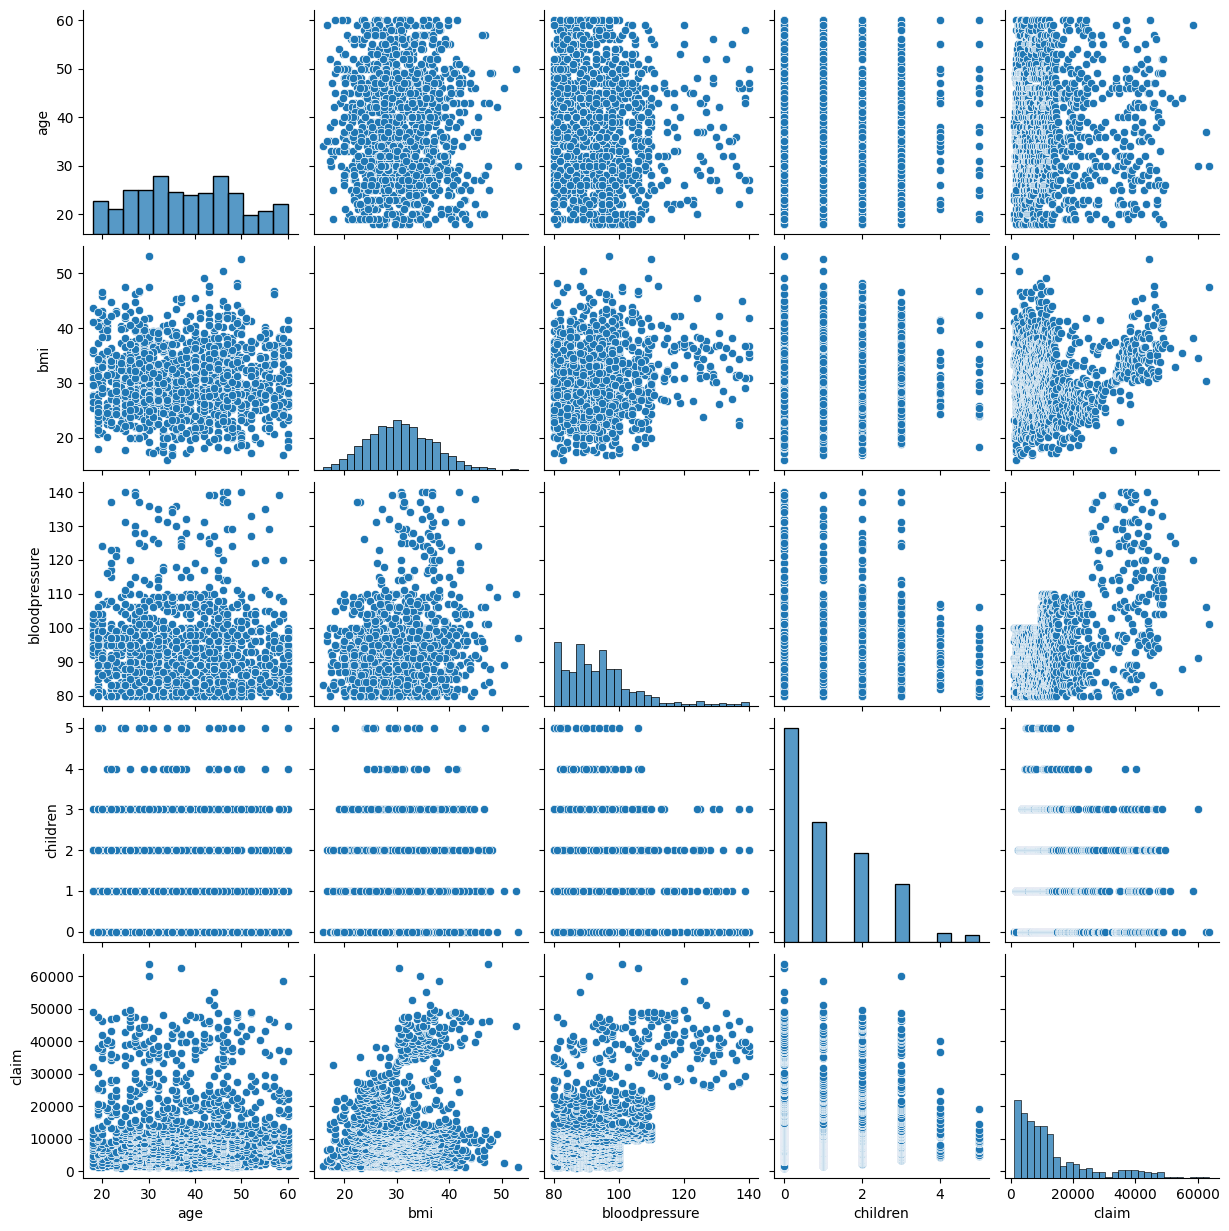

In [48]:
sns.pairplot(df)

#### Gender Vs Rest

In [49]:
pd.crosstab(df['gender'], df['bmi'], normalize='columns')*100

bmi,16.0,16.8,17.2,17.3,17.4,17.5,17.7,17.8,17.9,18.0,...,46.8,47.4,47.5,47.6,47.7,48.1,49.1,50.4,52.6,53.1
gender,,,,,,,,,,,,,,,,,,,,,
female,0.0,50.0,100.0,66.666667,50.0,0.0,0.0,100.0,0.0,100.0,...,100.0,100.0,0.0,100.0,0.0,100.0,0.0,0.0,0.0,0.0
male,100.0,50.0,0.0,33.333333,50.0,100.0,100.0,0.0,100.0,0.0,...,0.0,0.0,100.0,0.0,100.0,0.0,100.0,100.0,100.0,100.0


<Axes: xlabel='bloodpressure', ylabel='gender'>

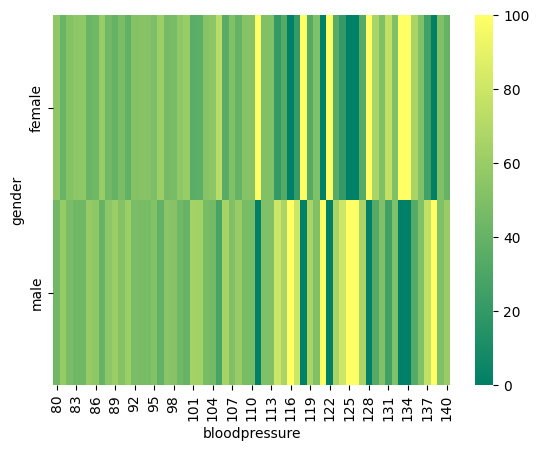

In [50]:
sns.heatmap(pd.crosstab(df['gender'], df['bloodpressure'], normalize='columns')*100, cmap='summer')

In [51]:
pd.crosstab(df['gender'], df['diabetic'], normalize='columns')*100

diabetic,No,Yes
gender,,
female,48.567335,50.311526
male,51.432665,49.688474


In [52]:
pd.crosstab(df['gender'], df['children'], normalize='columns')*100

children,0,1,2,3,4,5
gender,,,,,,
female,50.173611,48.765432,49.583333,49.044586,44.0,44.444444
male,49.826389,51.234568,50.416667,50.955414,56.0,55.555556


<Axes: xlabel='gender,children'>

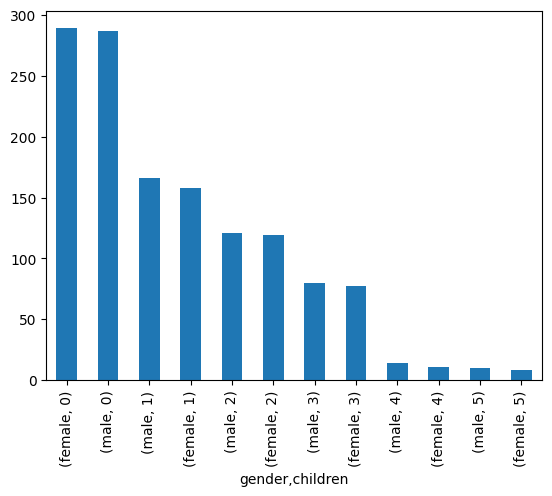

In [53]:
df[['gender', 'children']].value_counts().plot(kind='bar')

In [54]:
pd.crosstab(df['gender'], df['smoker'], normalize='columns')*100

smoker,No,Yes
gender,,
female,51.313321,41.970803
male,48.686679,58.029197


<Axes: xlabel='gender'>

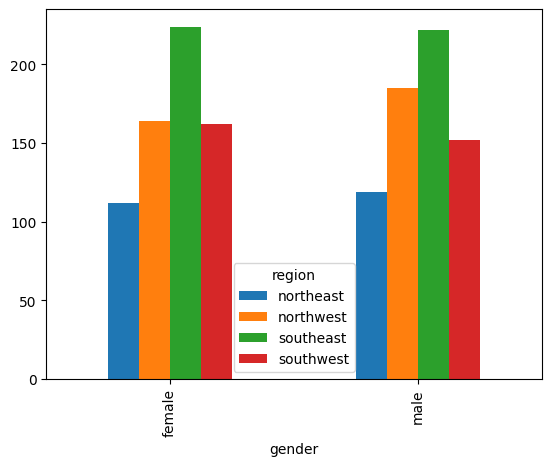

In [55]:
pd.crosstab(df['gender'], df['region']).plot(kind='bar')

array([<Axes: ylabel='northeast'>, <Axes: ylabel='northwest'>,
       <Axes: ylabel='southeast'>, <Axes: ylabel='southwest'>],
      dtype=object)

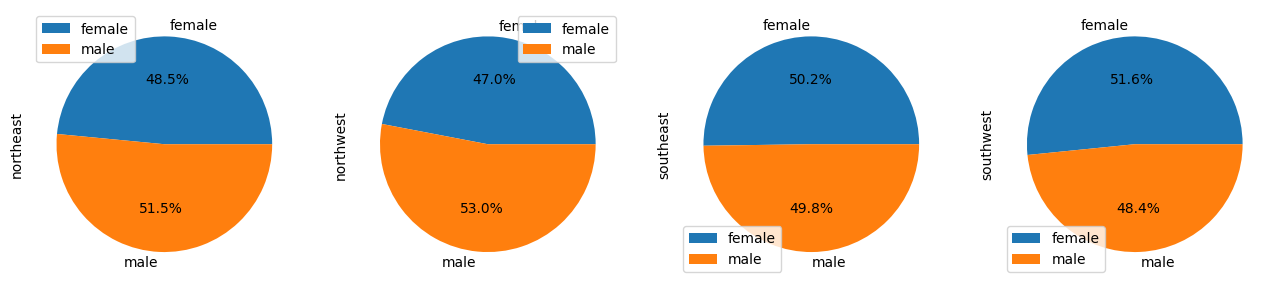

In [56]:
pd.crosstab(df['gender'], df['region']).plot(kind='pie', subplots=True, autopct='%0.1f%%', figsize=(16,12))

In [57]:
pd.crosstab(df['gender'], df['claim'], normalize='columns')*100

claim,1121.87,1131.51,1135.94,1136.40,1137.01,1137.47,1141.45,1146.80,1149.40,1163.46,...,48885.14,48970.25,49577.66,51194.56,52590.83,55135.40,58571.07,60021.40,62592.87,63770.43
gender,,,,,,,,,,,,,,,,,,,,,
female,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,100.0
male,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,0.0,100.0,100.0,100.0,100.0,0.0,0.0,100.0,100.0,0.0


#### BMI Vs Rest

<Axes: xlabel='bloodpressure', ylabel='bmi'>

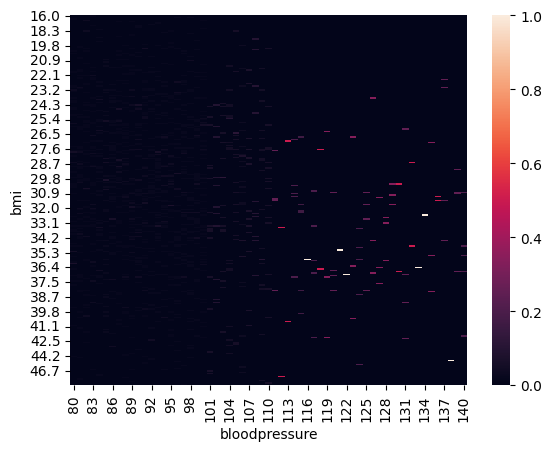

In [58]:
sns.heatmap(pd.crosstab(df['bmi'], df['bloodpressure'], normalize='columns'))

In [59]:
pd.crosstab(df['bmi'], df['diabetic'], normalize='columns')

diabetic,No,Yes
bmi,,
16.0,0.001433,0.000000
16.8,0.001433,0.001558
17.2,0.000000,0.001558
17.3,0.001433,0.003115
17.4,0.002865,0.000000
...,...,...
48.1,0.000000,0.001558
49.1,0.000000,0.001558
50.4,0.000000,0.001558


In [60]:
pd.crosstab(df['bmi'], df['children'], normalize='columns')

children,0,1,2,3,4,5
bmi,,,,,,
16.0,0.001736,0.000000,0.000000,0.0,0.0,0.0
16.8,0.000000,0.003086,0.004167,0.0,0.0,0.0
17.2,0.000000,0.000000,0.004167,0.0,0.0,0.0
17.3,0.001736,0.000000,0.008333,0.0,0.0,0.0
17.4,0.000000,0.006173,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...
48.1,0.000000,0.000000,0.004167,0.0,0.0,0.0
49.1,0.001736,0.000000,0.000000,0.0,0.0,0.0
50.4,0.000000,0.003086,0.000000,0.0,0.0,0.0


In [61]:
pd.crosstab(df['bmi'], df['smoker'], normalize='columns')

smoker,No,Yes
bmi,,
16.0,0.000938,0.00000
16.8,0.001876,0.00000
17.2,0.000000,0.00365
17.3,0.001876,0.00365
17.4,0.001876,0.00000
...,...,...
48.1,0.000938,0.00000
49.1,0.000938,0.00000
50.4,0.000938,0.00000


<Axes: xlabel='region', ylabel='bmi'>

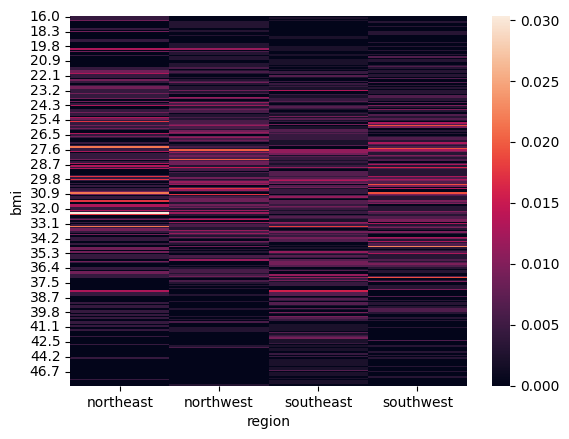

In [62]:
sns.heatmap(pd.crosstab(df['bmi'], df['region'], normalize='columns'))

<Axes: xlabel='claim', ylabel='bmi'>

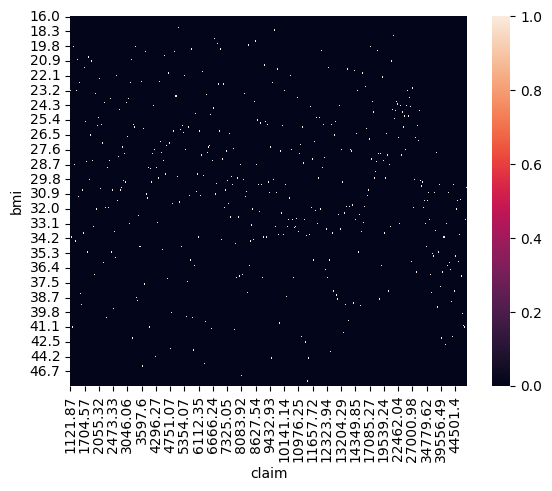

In [63]:
sns.heatmap(pd.crosstab(df['bmi'], df['claim'], normalize='columns'))

#### Bloodpressure Vs Rest

In [64]:
pd.crosstab(df['bloodpressure'], df['diabetic'], normalize='columns')

diabetic,No,Yes
bloodpressure,,
80,0.041547,0.046729
81,0.041547,0.045171
82,0.038682,0.042056
83,0.037249,0.043614
84,0.032951,0.031153
...,...,...
136,0.001433,0.001558
137,0.002865,0.003115
138,0.000000,0.001558


<Axes: xlabel='children', ylabel='bloodpressure'>

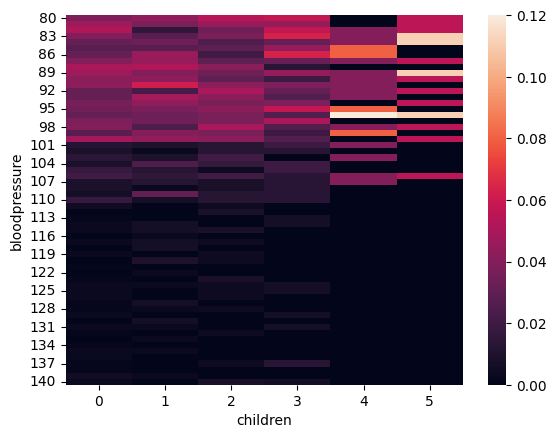

In [65]:
sns.heatmap(pd.crosstab(df['bloodpressure'], df['children'], normalize='columns'))

<Axes: xlabel='smoker', ylabel='bloodpressure'>

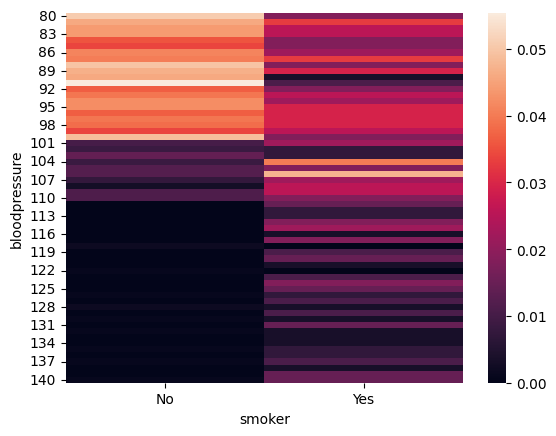

In [66]:
sns.heatmap(pd.crosstab(df['bloodpressure'], df['smoker'], normalize='columns'))

<Axes: xlabel='bloodpressure'>

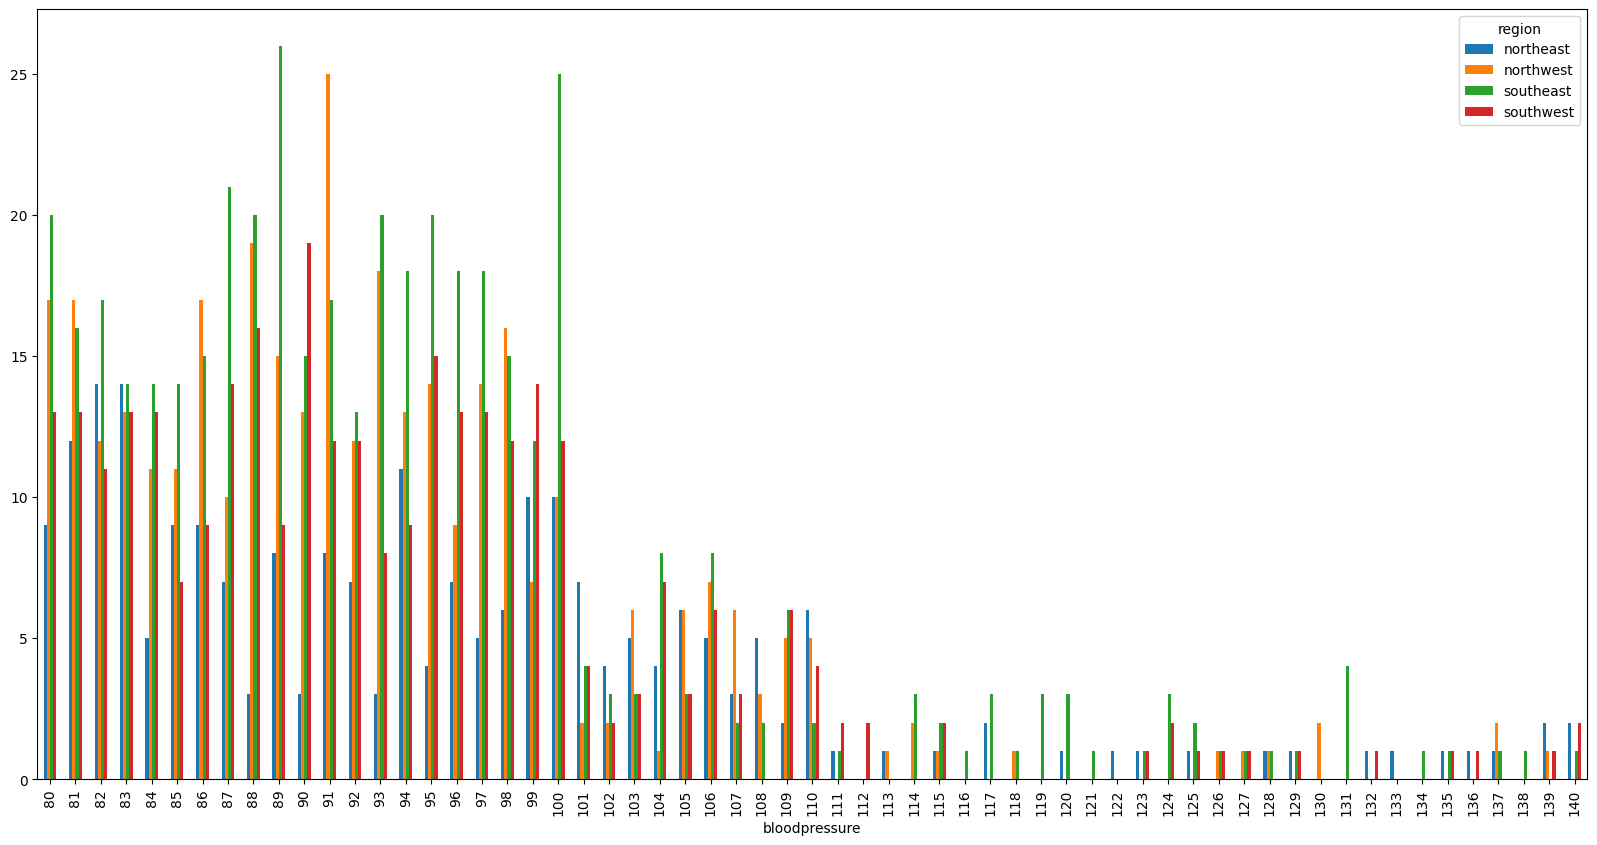

In [67]:
pd.crosstab(df['bloodpressure'], df['region']).plot(kind='bar', figsize=(20, 10))

<Axes: xlabel='claim', ylabel='bloodpressure'>

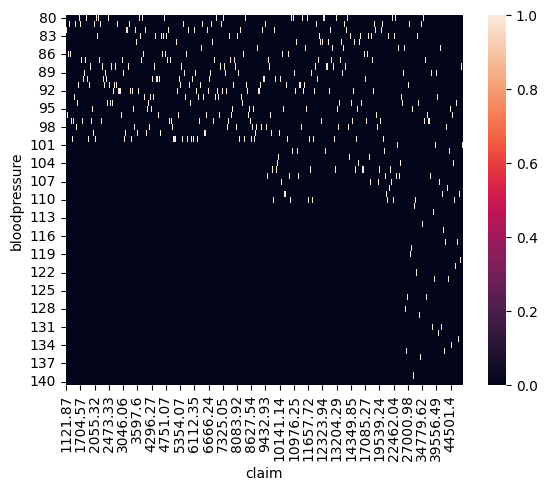

In [68]:
sns.heatmap(pd.crosstab(df['bloodpressure'], df['claim'], normalize='columns'))

#### Diabetic Vs Rest

In [69]:
pd.crosstab(df['diabetic'], df['children'], normalize='columns')

children,0,1,2,3,4,5
diabetic,,,,,,
No,0.506944,0.552469,0.5,0.528662,0.52,0.611111
Yes,0.493056,0.447531,0.5,0.471338,0.48,0.388889


<Axes: xlabel='diabetic'>

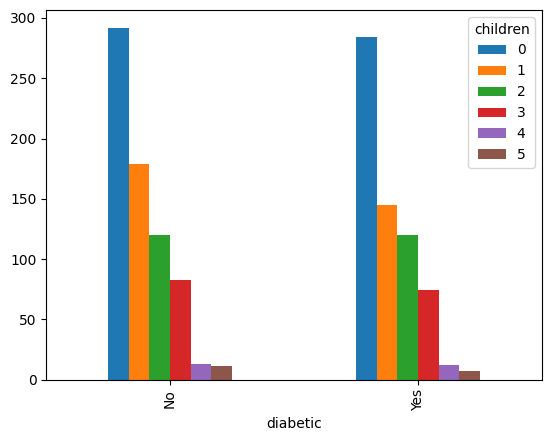

In [70]:
pd.crosstab(df['diabetic'], df['children']).plot(kind='bar')

In [71]:
pd.crosstab(df['diabetic'], df['smoker'], normalize='columns')

smoker,No,Yes
diabetic,,
No,0.525328,0.50365
Yes,0.474672,0.49635


<Axes: xlabel='diabetic'>

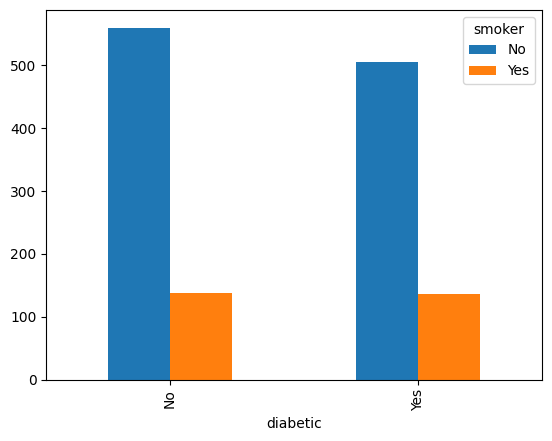

In [72]:
pd.crosstab(df['diabetic'], df['smoker']).plot(kind='bar')

In [73]:
pd.crosstab(df['diabetic'], df['region'], normalize='columns')

region,northeast,northwest,southeast,southwest
diabetic,,,,
No,0.47619,0.550143,0.506726,0.541401
Yes,0.52381,0.449857,0.493274,0.458599


<Axes: xlabel='diabetic'>

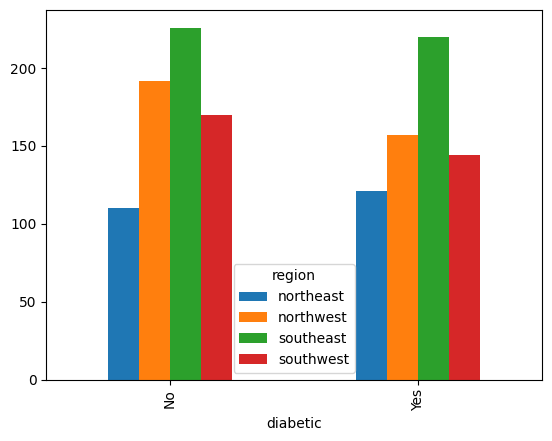

In [74]:
pd.crosstab(df['diabetic'], df['region']).plot(kind='bar')

In [75]:
pd.crosstab(df['diabetic'], df['claim'], normalize='columns')

claim,1121.87,1131.51,1135.94,1136.40,1137.01,1137.47,1141.45,1146.80,1149.40,1163.46,...,48885.14,48970.25,49577.66,51194.56,52590.83,55135.40,58571.07,60021.40,62592.87,63770.43
diabetic,,,,,,,,,,,,,,,,,,,,,
No,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
Yes,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


#### Children Vs Rest

In [78]:
pd.crosstab(df['children'], df['smoker'], normalize='columns')*100

smoker,No,Yes
children,,
0,43.245779,41.970803
1,24.671670,22.262774
2,17.354597,20.072993
3,11.069418,14.233577
4,2.063790,1.094891
5,1.594747,0.364964


<Axes: xlabel='children'>

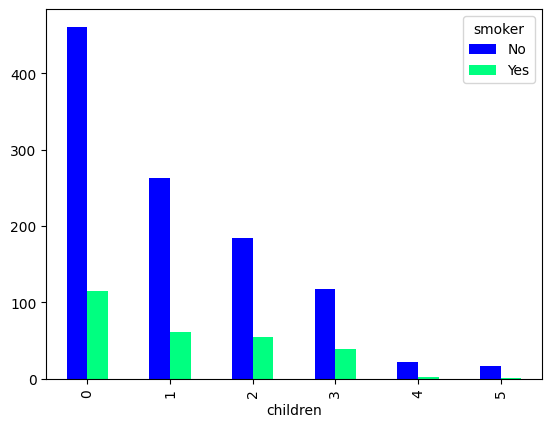

In [81]:
pd.crosstab(df['children'], df['smoker']).plot(kind='bar', cmap='winter')

In [82]:
pd.crosstab(df['children'], df['region'], normalize='columns')*100

region,northeast,northwest,southeast,southwest
children,,,,
0,45.454545,44.126074,42.376682,40.764331
1,24.675325,21.776504,25.560538,24.522293
2,16.017316,18.911175,17.937220,18.152866
3,10.822511,13.180516,10.986547,11.783439
4,2.597403,1.719198,1.345291,2.229299
5,0.432900,0.286533,1.793722,2.547771


<Axes: xlabel='children'>

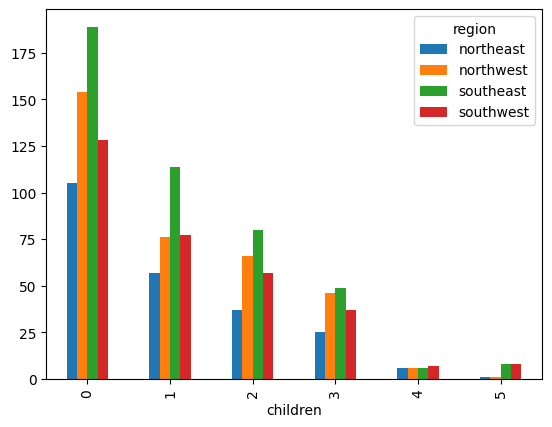

In [83]:
pd.crosstab(df['children'], df['region']).plot(kind='bar')

<Axes: xlabel='claim', ylabel='children'>

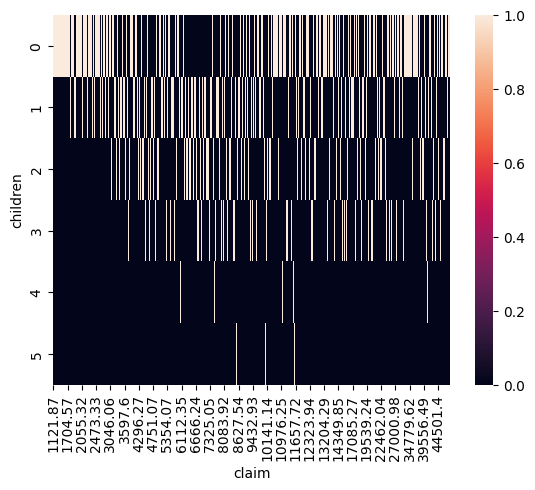

In [87]:
sns.heatmap(pd.crosstab(df['children'], df['claim'], normalize='columns'))

#### Smoker Vs Rest

In [89]:
pd.crosstab(df['smoker'], df['region'], normalize='columns')*100

region,northeast,northwest,southeast,southwest
smoker,,,,
No,70.995671,83.381089,79.596413,81.528662
Yes,29.004329,16.618911,20.403587,18.471338


<Axes: xlabel='smoker'>

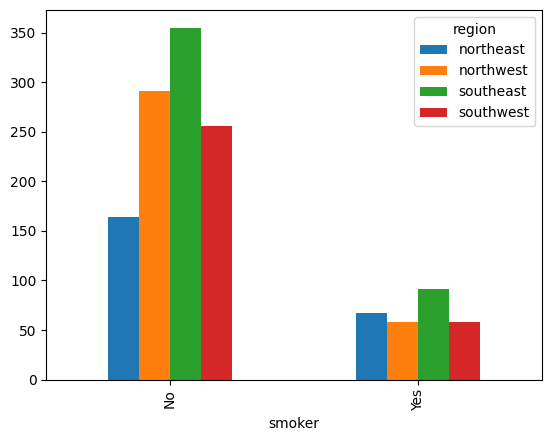

In [90]:
pd.crosstab(df['smoker'], df['region']).plot(kind='bar')

<Axes: xlabel='claim', ylabel='smoker'>

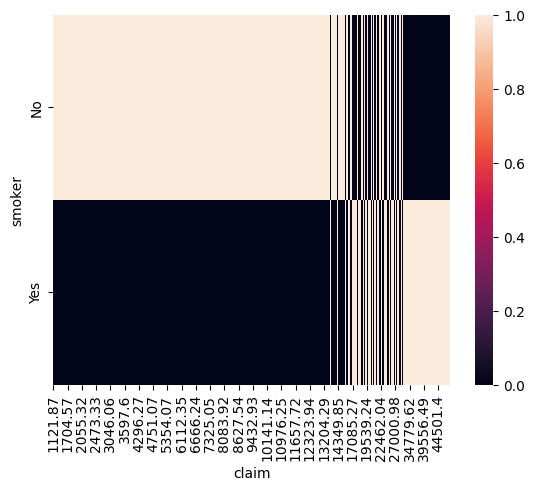

In [92]:
sns.heatmap(pd.crosstab(df['smoker'], df['claim'], normalize='columns'))

#### Region Vs Claim

<Axes: xlabel='claim', ylabel='region'>

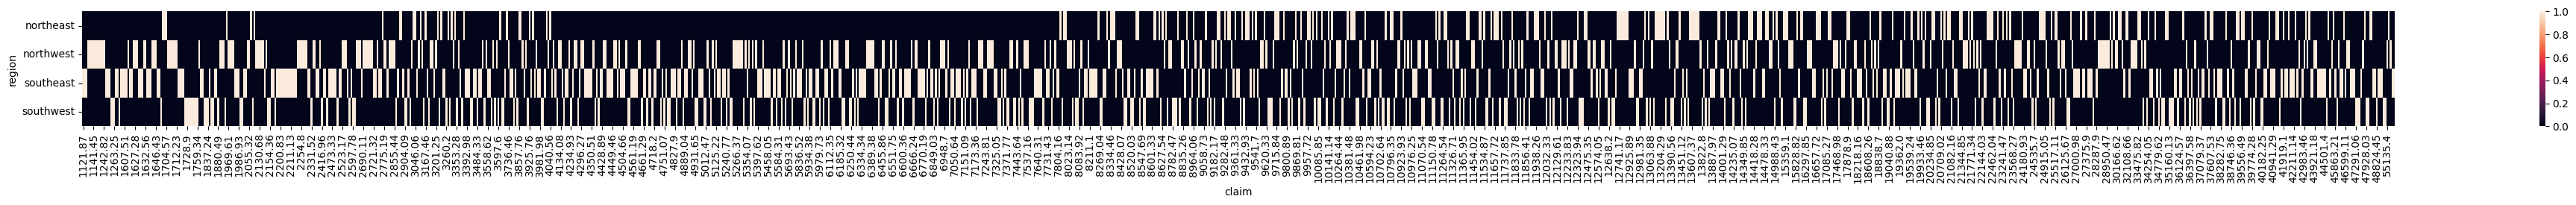

In [98]:
plt.figure(figsize=(50, 2))
sns.heatmap(pd.crosstab(df['region'], df['claim'], normalize='columns'))

### Maltivarient

<Axes: xlabel='age', ylabel='bmi'>

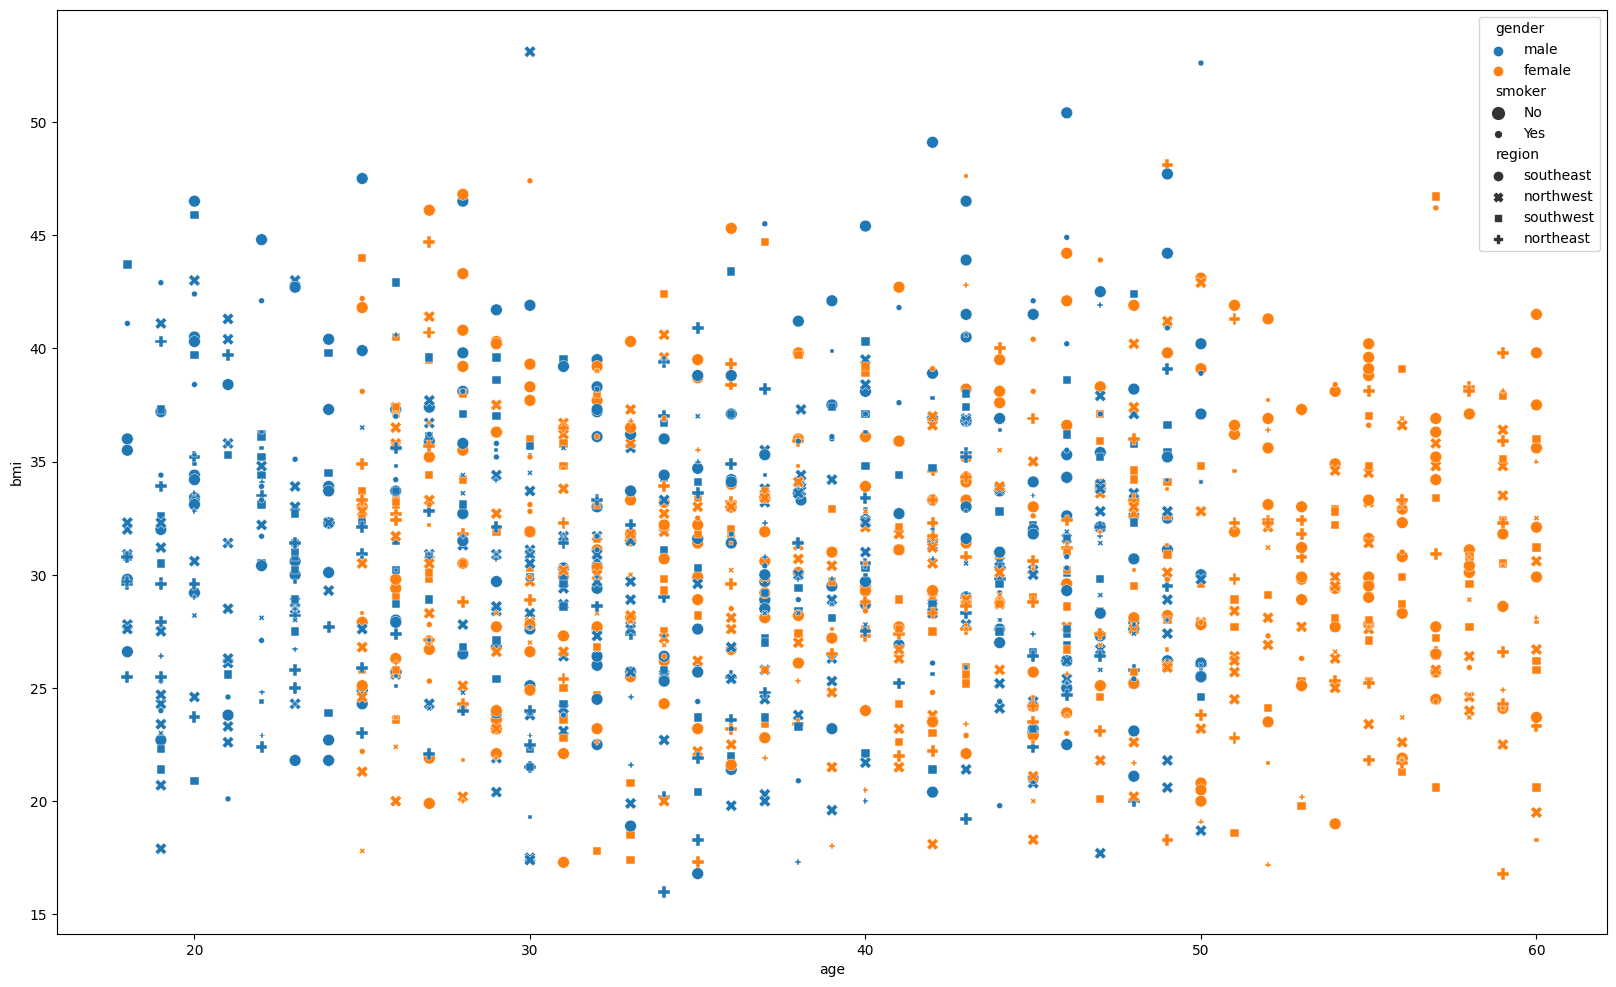

In [131]:
plt.figure(figsize = (20, 12))
sns.scatterplot(data=df, x='age', y='bmi', hue='gender', style='region', size='smoker')

<Axes: xlabel='age', ylabel='claim'>

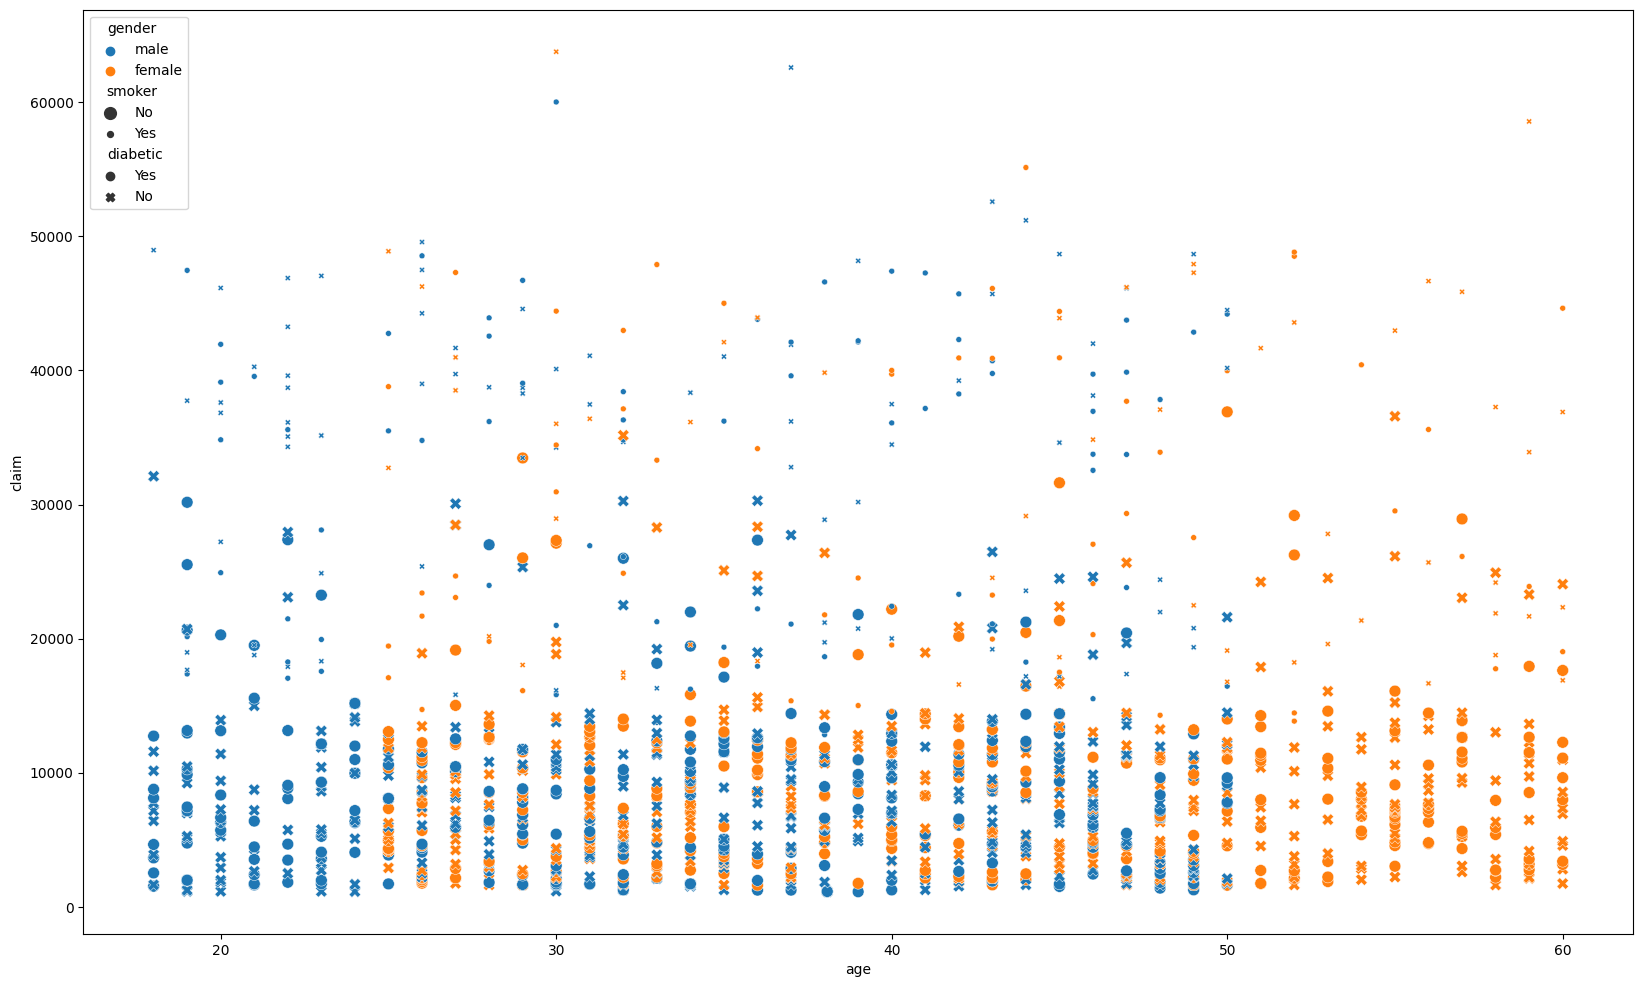

In [132]:
plt.figure(figsize = (20, 12))
sns.scatterplot(data=df, x='age', y='claim', hue='gender', style='diabetic', size='smoker')

<Axes: xlabel='claim', ylabel='bmi'>

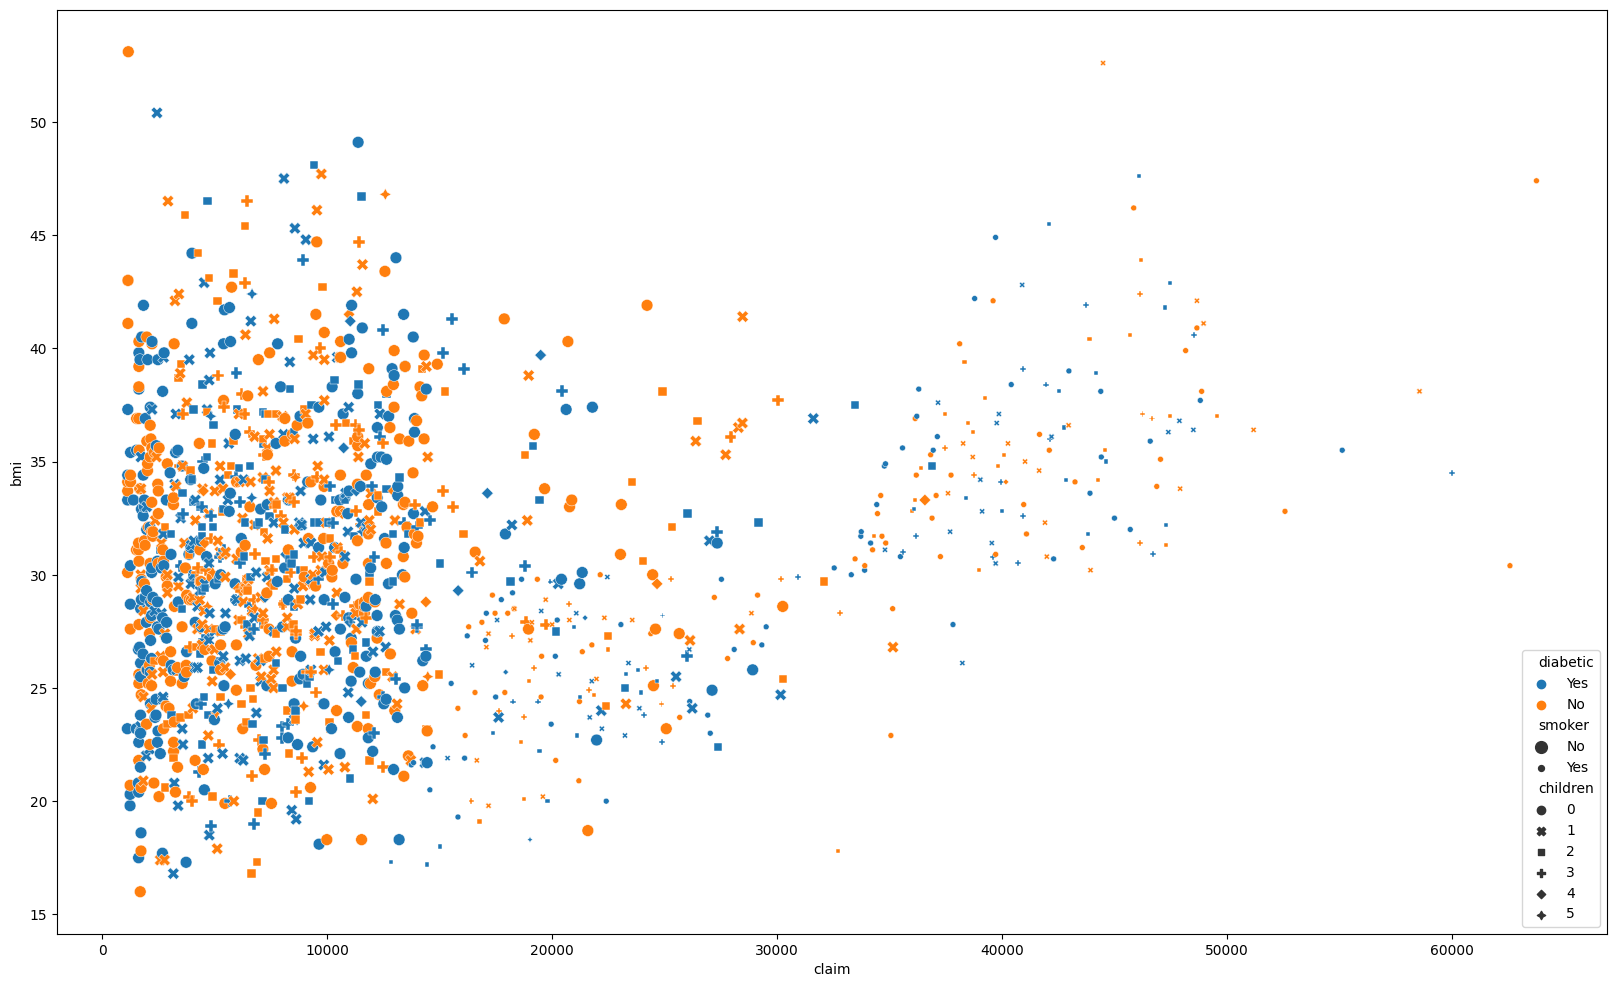

In [134]:
plt.figure(figsize = (20, 12))
sns.scatterplot(data=df, x='claim', y='bmi', hue='diabetic', style='children', size='smoker')